###### <font color="#483D8B">
<h1  align="center">Feature Analysis in Machine Learning</h1>
<h3 align="center"> Ansh Sikka</h3>
<h3 align="center"> 03/07/2018</h3>

## Overview

### Goals
* Stepwise selection (regression) of features based on p-values
* Principal component analysis using plot and explained variances
* Recursive feature elimination using logistic regression
* Feature importance using a Random Forest Classifier

### Skills
* Select features based on importance, weight, and effect on a model
* Eliminate features that negatively or negligibly interfere with the model

## Data 
The dataset used was a Caravan Insurance dataset from Kaggle. The link to the dataset is https://www.kaggle.com/uciml/caravan-insurance-challenge/version/1.
The fields and row counts can be found in the link above (ommited from notebook due to length).

Let's start by importing libraries needed to work with the data.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import warnings

In [0]:
warnings.filterwarnings("ignore", category=FutureWarning)
# import csv data into pandas dataframe
insurance_df = pd.read_csv('caravan-insurance-challenge.csv')
insurance_df_vals = insurance_df.values 


Since the data is all labeled (specified on Kaggle), all we have to do is a split by training and testing data. We know that 5822 rows are for training the thre remaining 4000 are for testing. However, we can already see that there is a class imabalance. 

In [0]:
# train/test split
df = insurance_df_pandas.drop(['ORIGIN'], axis=1)
y = df['CARAVAN']
X = df.drop(['CARAVAN'], axis = 1)
Xalt = X.values
yalt = y.values
X_train = X[0: 5822]
Y_train = y[0: 5822]

x_test = X[5822:9822]
y_test = y[5822:9822]


In [0]:
insurance_df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


In [0]:
def score_model(model, xtest, ytest):
    score = 0
    results = []
    for i in range(len(xtest)):
        result = model.predict([xtest[i]])
        results.append(result)
        if result == ytest[i]:
            score+=1
        else:
            continue
    return score/len(xtest), results

## Exploratory Data Analysis and Models

### Stepwise Feature Selection Based on P-Values
Stepwise regression is a way of reducing dimensionality by fitting regression models where the choice of predictive (input) variables are automatically calculated. During each iteration, each variable is considered to be a part of (or not) of the set of explanatory variables. Essentially, it checks every variable for the lowest p-value and decide which top input variables we use from there. We remove all of the values that don't meet the specified p-value threshold. 

The starter code below was pulled from Excercise 6. 

Let's start with a DecisionTreeClassifier that will run without any dimensionallity reduction. 

In [0]:
tree = DecisionTreeClassifier().fit(X_train.values, Y_train.values)
tree_score = score_model(tree, x_test.values, y_test.values)
print("AUC Score: ", roc_auc_score(y_test.values, tree_score[1]))

AUC Score:  0.536126412287403


In [0]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

We see that this selects best features based on a threshold p-value of 0.05. That is, any feature with a p-value that is less than 0.05 will be considered. 

In [0]:
stepwise_selection_result = stepwise_selection(X, y)
print(stepwise_selection_result)

Add  PPERSAUT                       with p-value 2.14684e-42
Add  MKOOPKLA                       with p-value 1.36739e-21
Add  PWAPART                        with p-value 3.66711e-15
Add  APLEZIER                       with p-value 8.20766e-15
Add  MOPLHOOG                       with p-value 4.25236e-06
Add  PBRAND                         with p-value 3.92829e-06
Add  MBERBOER                       with p-value 8.31838e-06
Add  MRELGE                         with p-value 1.41977e-05
Add  PWALAND                        with p-value 0.000361295
Add  ABRAND                         with p-value 0.000937601
Add  AZEILPL                        with p-value 0.00153041
Add  MINK123M                       with p-value 0.00152554
Add  PBYSTAND                       with p-value 0.00243579
Add  PGEZONG                        with p-value 0.00485648
Add  AGEZONG                        with p-value 0.00450709
Add  MHHUUR                         with p-value 0.00630075
['PPERSAUT', 'MKOOPKLA', 'PWAP

In [0]:
sw_X_train = X_train[stepwise_selection_result].values
sw_x_test = x_test[stepwise_selection_result].values
tree = DecisionTreeClassifier().fit(sw_X_train, Y_train.values)
tree_score = score_model(tree, sw_x_test, y_test.values)
print("AUC Score: ", roc_auc_score(y_test.values, tree_score[1]))

AUC Score:  0.5354317165462676


#### Interpretation
The top features to include (with the lowest p-values ranked from smallest to highest within threshold 0.05): 
* Contribution Car Policies (PPERSAUT)
* Purchasing Power Class (MKOOPKLA)
* Contribution Private Third Party Insurance (PWAPART)
* Number of Boat Policies (APLEZIER)
* High Level Education (MOPLHOOG)
* Contribution Fire Policies (PBRAND)
* Farmer (MBERBOER)
* Married (MRELEGE)
* Contribution Third Party Insurance - Agriculture (PWALAND)
* Number of Fire Policies (ABRAND)
* Number of Surfboard Policies (AZEILPL)
* Income > 123,000 (MINK123M)
* Contribution Social Security Insurance Policies (PBYSTAND)
* Contribution Family Accidents Insurance Policies (PGEZONG)
* Number of Family Accidents Insurance Policies (AGEZONG)
* Rented House (MHHUR)

When we run this selection, it tests every feature for its p-value. The smaller the p-value, the higher effect it has to the response variable. Essentially, we want featuers with a p-value that is less than 0.05, showing that there is a 95% probability that this feature DOES affect the response variable. 

We see that the score went DOWN this time when only including these features. This means that there WERE other features that should have been considered in the dataset. 

### Principal Component Analysis 
Principal Component Analysis (PCA) is the process of linealy mapping the data to a lower-dimensional space. This will allow the explained variance in the lower-dimensional space respresentation to become maximized. This is a style of feature extraction, where we DON'T eliminate features, but rather combine them to a smaller feature set. 

We will visualize and get explained variance through scikit-learn. 

In [0]:
def pca_reduction(X, n_features):
    pca = PCA(n_components = n_features)
    pca.fit(X)
    X_pca = pca.transform(X)
    print("Original shape: ", X.shape)
    print("Transformed shape: ", X_pca.shape)
    return pca, X_pca

def plot(pca):
    X_new = pca.transform(pca)
    plt.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], X[:, 2], X[:, 3], X[:, 4], alpha=0.8)
    plt.axis('equal')
    

In [0]:
results = pca_reduction(X_train, 25)
print(results[0].explained_variance_)
pca_X_train = results[1]
results = pca_reduction(x_test, 25)
pca_x_test = results[1]

Original shape:  (5822, 85)
Transformed shape:  (5822, 25)
[182.48598842  29.75020727  12.25731415   9.09129619   8.59044367
   7.32731163   5.21631816   4.45781232   4.18395324   3.96020758
   3.7933194    3.33552439   2.96828249   2.8415374    2.41420581
   2.30757616   2.01705444   1.86114386   1.6143338    1.50139752
   1.3890914    1.36744185   1.31915783   1.21408831   1.12633361]
Original shape:  (4000, 85)
Transformed shape:  (4000, 25)


In [0]:
tree = DecisionTreeClassifier().fit(pca_X_train, Y_train.values)
tree_score = score_model(tree, pca_x_test, y_test.values)
print("AUC Score: ", roc_auc_score(y_test.values, tree_score[1]))

AUC Score:  0.5425406207139952


#### Interpretation
As we can see above, we are reducing the dimmensionality of the feature set from 85 to just 5 features. The results below show the maximized explained variances for each of the features. Now that these features are reduced to 5, we can have a little more room for interpretation of the features. In the graph, we can see that the features are combined into 5 features (all independent from each other) with high variances. 

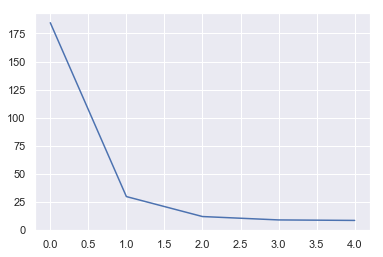

In [0]:
plt.plot(results[0].explained_variance_)

In [0]:
### Logistic Regression using Recursive Feature Elimination
Logistic regression is simply a way to classify a binary dependent variable (only two classes). Recursive feature elimination can be applied to this model by removing the weakest features (with lowest effect in the response variable) and testing accuracies. 

AUC Score Before Reduction:  0.505637980870179
MOSTYPE :  42
MAANTHUI :  14
MGEMOMV :  56
MGEMLEEF :  23
MOSHOOFD :  41
MGODRK :  40
MGODPR :  65
MGODOV :  66
MGODGE :  55
MRELGE :  27
MRELSA :  53
MRELOV :  33
MFALLEEN :  52
MFGEKIND :  50
MFWEKIND :  51
MOPLHOOG :  54
MOPLMIDD :  45
MOPLLAAG :  24
MBERHOOG :  49
MBERZELF :  59
MBERMIDD :  47
MBERARBG :  60
MBERARBO :  48
MSKA :  63
MSKB1 :  69
MSKB2 :  64
MSKC :  46
MSKD :  68
MAUT1 :  34
MAUT2 :  35
MAUT0 :  36
MZFONDS :  26
MZPART :  25
MINKM30 :  31
MINK3045 :  30
MINK4575 :  29
MINK7512 :  28
MINK123M :  21
MINKGEM :  32
MKOOPKLA :  43
PWABEDR :  20
PWALAND :  6
PPERSAUT :  13
PBESAUT :  61
PMOTSCO :  38
PAANHANG :  5
PTRACTOR :  17
PBROM :  67
PLEVEN :  16
PPERSONG :  8
PWAOREG :  7
PBRAND :  3
PZEILPL :  39
PPLEZIER :  22
PFIETS :  12
PBYSTAND :  70
AWABEDR :  19
AWALAND :  57
APERSAUT :  62
ABESAUT :  4
AMOTSCO :  37
AVRAAUT :  44
AAANHANG :  10
ATRACTOR :  11
AWERKT :  18
ALEVEN :  15
APERSONG :  58
ABRAND :  2
AZEILPL :  9


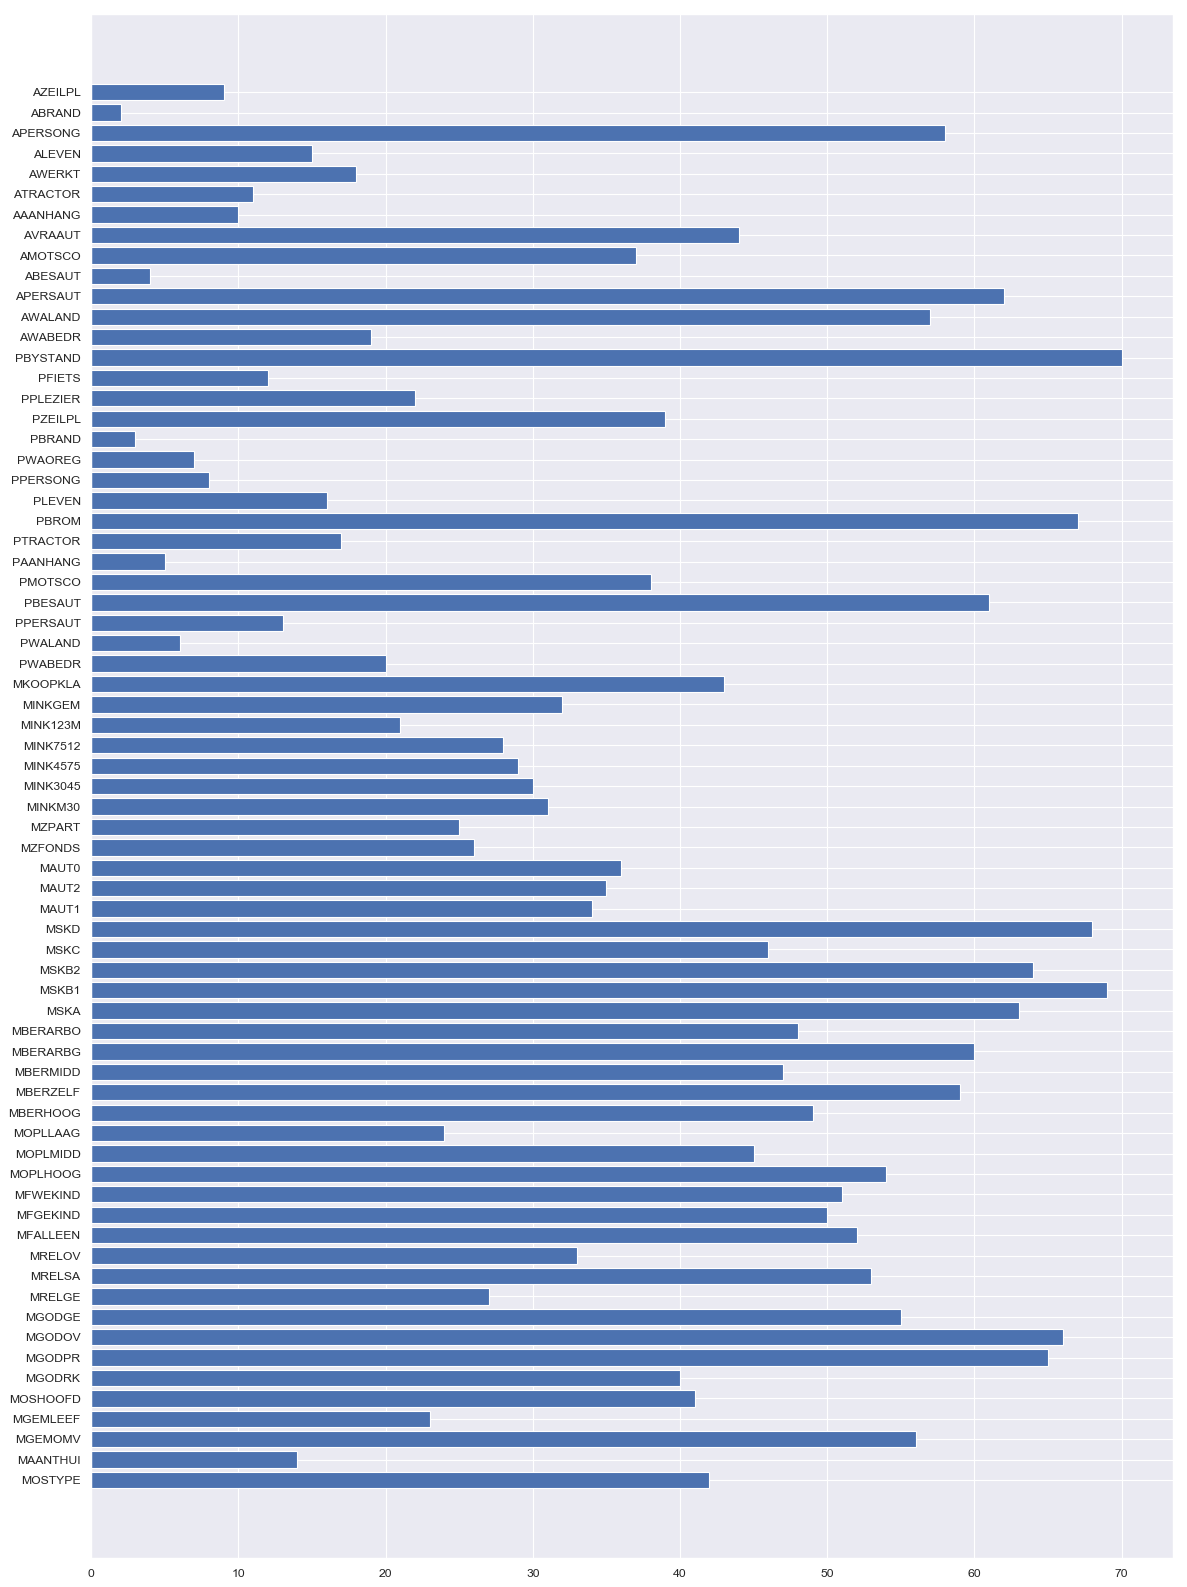

AUC Score after Reduction:  0.5018350242808447


In [0]:
log = LogisticRegression()
log.fit(X_train.values, Y_train.values)
reg_score = score_model(log, x_test.values, y_test.values)
print("AUC Score Before Reduction: ", roc_auc_score(y_test.values, reg_score[1]))

rfe = RFE(log, 16) # reduce to 16 features
rfe.fit(X_train, Y_train)
feature_included = rfe.support_
feature_mine = []
feature_rankings = rfe.ranking_
features = []

for i in range (0, len(feature_rankings)):
    if feature_included[i] == False:
        print(X_train.columns[i], ": ", feature_rankings[i])
        feature_mine.append(feature_rankings[i])
        features.append(X_train.columns[i])
    else:
        continue
plt.figure(num=None, figsize=(15, 20), dpi=80, facecolor='w', edgecolor='k')
plt.barh(features, feature_mine)
plt.tight_layout()
plt.show()
reg_score = score_model(rfe, x_test.values, y_test.values)

print("AUC Score after Reduction: ", roc_auc_score(y_test.values, reg_score[1]))


#### Interpretation
As we can see from the highest rankings, it almost matches the results from the stepwise feature selection model (give or take a few features). This is based on accuracy of model from each feature, NOT p-value. This might be a little more risky to use since it doesn't test covariance. 

However, when we look at the AUC score after the reduction, it goes down? This makes us consider if the 16 most features are enough to classify this. 

### Random Forest Classifier with Feature Importance

A random forest classifier is simply a decision tree classifier with a degree of randomness that decorrelates the trees. We incorporate a feature importance measure 

AUC Score Before Reduction:  0.5247342956321284
AUC Score after Reduction:  0.5


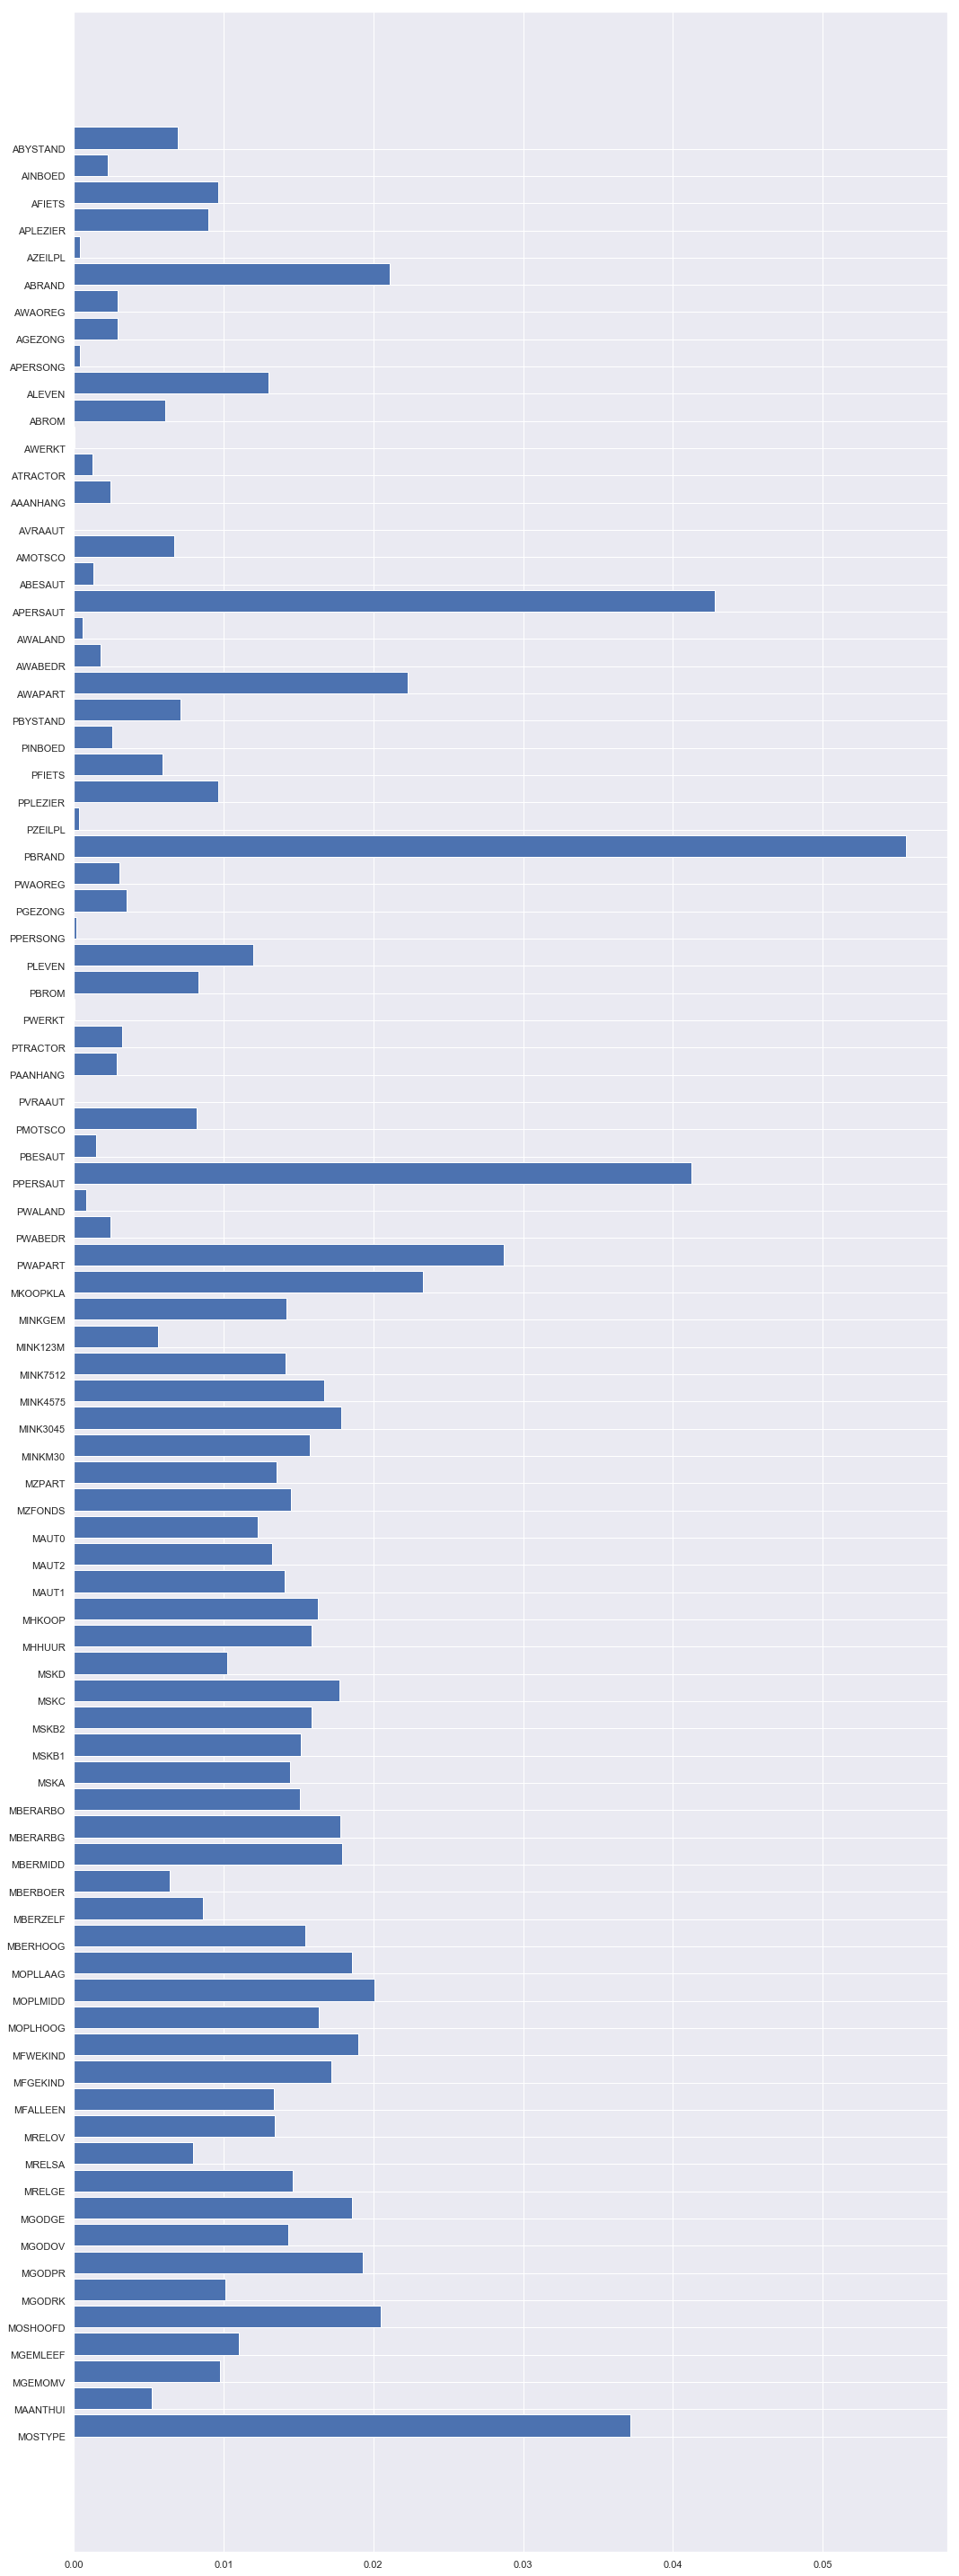

In [0]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
rf_score = score_model(rf, x_test.values, y_test.values)
print("AUC Score Before Reduction: ", roc_auc_score(y_test.values, rf_score[1]))

importances = rf.feature_importances_
rd_X_train = X_train[['APERSAUT', 'PBRAND', 'PPERSAUT']].values
rd_x_test = x_test[['APERSAUT', 'PBRAND', 'PPERSAUT']].values
rf.fit(rd_X_train, Y_train.values)
rf_score = score_model(rf, rd_x_test, y_test.values)
plt.figure(figsize=(15, 40))  # width:20, height:3
plt.barh(X_train.columns, importances, align = 'edge')
plt.tight_layout()
print("AUC Score after Reduction: ", roc_auc_score(y_test.values, rf_score[1]))


#### Interpretation
Looking at this graph we can see the top 3 important features from the random forest classifier are:
* Number of Car Policies (APERSAUT)
* Contribution Fire Policies (PBRAND)
* Contribution Car Policies (PPERSAUT)

We see this model extracted a top feature not examined by the stepwise extraction: contribution car policies. This is probably due to it's weight and accuracy in predicting the response variable. Car insurance is a pretty great factor. 

We can see that the score goes down AGAIN after reducing the number of features. What might be wrong? We can discuss this in the conclusion

## Conclusion
Let's compare the results from before and after each feature reduction. 


| Model                                            	| AUC Before Feature Reduction 	| AUC After Feature Reduction 	|
|--------------------------------------------------	|------------------------------	|-----------------------------	|
| Stepwise Feature Selection                       	| 0.53612                      	| 0.53543                     	|
| Principle Component Analysis                     	| N/A                          	| 0.54254                     	|
| Recursive Feature Elimination                    	| 0.50563                      	| 0.50183                     	|
| Selection by Feature Importance (Top 3 Features) 	| 0.52473                      	| 0.50000                     	|


We see that the AUC score always decreased after reducing features. There are a few explanations to this 
* The rest of the features (there are 85) also have a decent impact on the output variable.
* The data was overfitted in every model (Decision Tree, Random Forest, Logistic), leading to high variance in other datasets
* The data was underfitted (with low dimensionality) increasing bias. 

Therefore, we cannot conclude the reducing dimensionality to just a FEW features will help. We probably want to reduce, but to a higher number. Something like 40 or 50 top features, and go down from there. 